In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

data = pd.read_csv(r"C:\PythonScripts\course-files2\housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)

X = data.drop('MEDV', axis=1)
y = data['MEDV'].values

In [3]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
lasso_df = pd.DataFrame({'param_value': np.arange(start = 0, stop = 10.1, step = 0.1),
                      'r2_result': 0.,
                      'number_of_features':0})
lasso_df

,param_value,r2_result,number_of_features
0,0.0,0.0,0
1,0.1,0.0,0
2,0.2,0.0,0
3,0.3,0.0,0
4,0.4,0.0,0
...,...,...,...
96,9.6,0.0,0
97,9.7,0.0,0
98,9.8,0.0,0
99,9.9,0.0,0


In [8]:
for row in range(lasso_df.shape[0]):
    alpha=lasso_df.loc[row,'param_value']
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_df.at[row,'r2_result']=r2_score(y_test, lasso.predict(X_test))
    lasso_df.at[row,'number_of_features'] = len(lasso.coef_[lasso.coef_ > 0])
lasso_df

C:\Users\Lila\AppData\Local\Temp/ipykernel_4888/1756422468.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\Users\Lila\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lila\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e+03, tolerance: 3.490e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,param_value,r2_result,number_of_features
0,0.0,0.674351,7
1,0.1,0.665547,5
2,0.2,0.650766,4
3,0.3,0.642035,3
4,0.4,0.634066,3
...,...,...,...
96,9.6,-0.003915,0
97,9.7,-0.003915,0
98,9.8,-0.003915,0
99,9.9,-0.003915,0


In [9]:
ridge_df = pd.DataFrame({'param_value': np.arange(start = 0, stop = 10.1, step = 0.1),
                      'r2_result': 0.,
                      'number_of_features':0})
ridge_df

,param_value,r2_result,number_of_features
0,0.0,0.0,0
1,0.1,0.0,0
2,0.2,0.0,0
3,0.3,0.0,0
4,0.4,0.0,0
...,...,...,...
96,9.6,0.0,0
97,9.7,0.0,0
98,9.8,0.0,0
99,9.9,0.0,0


In [11]:
for row in range(ridge_df.shape[0]):
    alpha=ridge_df.loc[row,'param_value']
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_df.at[row,'r2_result']=r2_score(y_test, ridge.predict(X_test))
    ridge_df.at[row,'number_of_features'] = len(ridge.coef_[ridge.coef_ > 0])
ridge_df

,param_value,r2_result,number_of_features
0,0.0,0.674351,7
1,0.1,0.674338,7
2,0.2,0.674324,7
3,0.3,0.674310,7
4,0.4,0.674296,7
...,...,...,...
96,9.6,0.673019,7
97,9.7,0.673006,7
98,9.8,0.672993,7
99,9.9,0.672980,7


In [12]:
elastic_df = pd.DataFrame({'param_value': np.arange(start = 0, stop = 10.1, step = 0.1),
                      'r2_result': 0.,
                      'number_of_features':0})
elastic_df

,param_value,r2_result,number_of_features
0,0.0,0.0,0
1,0.1,0.0,0
2,0.2,0.0,0
3,0.3,0.0,0
4,0.4,0.0,0
...,...,...,...
96,9.6,0.0,0
97,9.7,0.0,0
98,9.8,0.0,0
99,9.9,0.0,0


In [13]:
for row in range(elastic_df.shape[0]):
    alpha=elastic_df.loc[row,'param_value']
    elastic=ElasticNet(alpha=alpha)
    elastic.fit(X_train, y_train)
    elastic_df.at[row,'r2_result']=r2_score(y_test, elastic.predict(X_test))
    elastic_df.at[row,'number_of_features'] = len(elastic.coef_[elastic.coef_ > 0])
elastic_df

C:\Users\Lila\AppData\Local\Temp/ipykernel_4888/2527448192.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic.fit(X_train, y_train)
C:\Users\Lila\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lila\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e+03, tolerance: 3.490e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,param_value,r2_result,number_of_features
0,0.0,0.674351,7
1,0.1,0.667834,5
2,0.2,0.662359,5
3,0.3,0.657454,5
4,0.4,0.653555,4
...,...,...,...
96,9.6,0.088479,1
97,9.7,0.085463,1
98,9.8,0.082483,1
99,9.9,0.079540,1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\Lila\AppData\Local\Temp/ipykernel_4888/1028737483.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


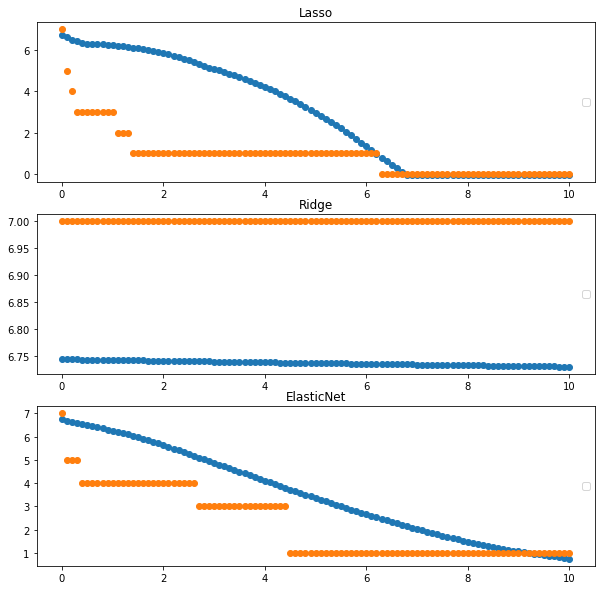

In [20]:
fig, axs=plt.subplots(3, figsize=(10,10))
axs[0].title.set_text('Lasso')
axs[0].scatter(lasso_df['param_value'], lasso_df['r2_result']*10)
axs[0].scatter(lasso_df['param_value'], lasso_df['number_of_features'])
axs[0].legend(loc='center right')

axs[1].title.set_text('Ridge')
axs[1].scatter(ridge_df['param_value'], ridge_df['r2_result']*10)
axs[1].scatter(ridge_df['param_value'], ridge_df['number_of_features'])
axs[1].legend(loc='center right')

axs[2].title.set_text('ElasticNet')
axs[2].scatter(elastic_df['param_value'], elastic_df['r2_result']*10)
axs[2].scatter(elastic_df['param_value'], elastic_df['number_of_features'])
axs[2].legend(loc='center right')
fig.show()